In [151]:
import numpy as np
import pandas as pd

sound_data = pd.read_csv('datasets/jrelabeled.csv')
X = sound_data.drop(['filename', 'label'], axis=1)
y = sound_data['label']
sound_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,predictions
0,jre11692500_0.wav,0.490575,0.025069,2171.913549,2139.885722,4431.553141,0.101278,-380.533020,112.694641,-31.796848,...,-5.020499,-8.176243,-6.034646,5.141100,-4.364628,-1.783790,-1.651915,-2.534616,1,0.999969
1,jre11692500_1.wav,0.441578,0.031176,2452.753355,2400.318018,5115.332031,0.126144,-353.482391,92.485397,-3.311667,...,-5.873488,2.105093,-7.501835,2.208278,-3.906220,-3.250791,-2.498704,0.930458,1,0.999984
2,jre11692500_10.wav,0.391119,0.049024,2102.894499,2018.743044,3995.107015,0.106585,-298.112457,105.581268,-1.911337,...,-13.941048,0.797238,-8.774372,-1.213172,-6.336737,-4.957156,-6.576495,-1.673529,1,0.999745
3,jre11692500_100.wav,0.428866,0.045402,2333.984810,2293.200629,4721.254476,0.122138,-320.261993,90.473358,-6.332556,...,-5.851745,1.892823,-8.513250,-0.875803,-3.156975,1.127327,-8.081711,-0.223936,-1,0.835268
4,jre11692500_1000.wav,0.392580,0.078346,2117.510208,1985.690741,4041.263835,0.106025,-212.490799,114.457481,-15.307856,...,-9.025507,5.128049,-10.878364,-1.351574,-6.415203,-4.860430,-8.252588,-0.868342,-1,0.180652


In [152]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

st_scaler = StandardScaler()
rfeatures = st_scaler.fit_transform(X)

rb_scaler = RobustScaler()
#rfeatures = rb_scaler.fit_transform(X)

In [153]:
efeatures = TSNE(n_components=2).fit_transform(rfeatures)

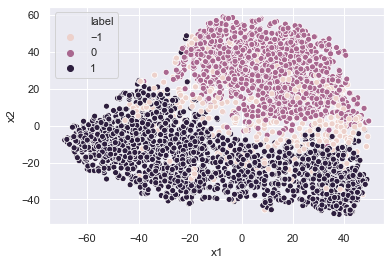

In [206]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

reduced_data = pd.DataFrame(efeatures, columns=['x1', 'x2'])
reduced_data['label'] = sound_data['label']
sns.scatterplot(x='x1', y='x2', hue='label', data=reduced_data)

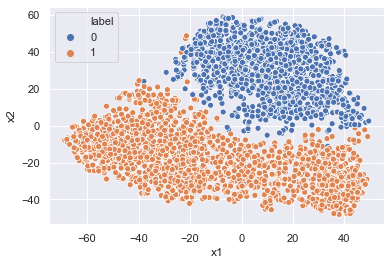

In [155]:
sns.scatterplot(x='x1', y='x2', hue='label', data=reduced_data[reduced_data['label'] != -1])

# Adding more datapoints

In [191]:
climate_data = pd.read_csv('datasets/roganclimate_dataset.csv')
climate_data = climate_data.drop(0)

In [192]:
total_data = pd.concat([sound_data.drop(['predictions', 'filename'], axis=1), climate_data.drop(['filename'], axis=1)], ignore_index=True)

In [193]:
st_scaler = StandardScaler()
total_features = st_scaler.fit_transform(total_data.drop('label', axis=1))
total_features = TSNE(n_components=2).fit_transform(total_features)

In [202]:
totals_data = pd.DataFrame(total_features, columns=['x1', 'x2'])
totals_data['label'] = total_data['label'].replace(['roganclimate'], [2])

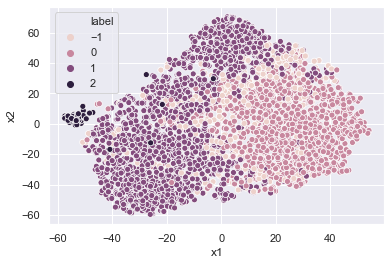

In [204]:
sns.scatterplot(x='x1', y='x2', hue='label', data=totals_data)

In [203]:
totals_data['label'].value_counts()

 1    1734
 0    1140
-1     373
 2      57
Name: label, dtype: int64

In [200]:
reduced_data

,x1,x2,label
0,0.680603,-10.658821,1
1,15.826728,-24.744438,1
2,-29.614750,-17.388260,1
3,-4.594657,-12.082340,-1
4,-12.126361,23.537014,-1
...,...,...,...
3242,-45.247356,-13.601420,1
3243,-8.114655,-19.583235,1
3244,16.536526,-39.184528,1
3245,-32.245754,-34.396145,1


In [207]:
labeled_data = pd.read_csv('datasets/joeandelon_dataset.csv')
labX = labeled_data.drop(['filename', 'label'], axis=1)
laby = labeled_data['label']
labeled_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,jre11692500_1052.wav,0.448598,0.028928,2080.847448,2008.882838,3923.628743,0.115741,-341.318420,113.181503,-7.962464,...,2.251206,-7.436673,1.016100,-7.232157,0.593498,-3.061135,-5.036133,-5.082611,2.814416,onlyelon
1,jre11692500_1110.wav,0.465239,0.035019,2029.441322,2164.512973,4094.698079,0.093406,-342.853485,117.616440,-6.780078,...,0.875378,-10.107781,2.555796,-4.323263,1.607108,-2.905854,-3.368111,-4.217307,2.550136,onlyelon
2,jre11692500_1221.wav,0.417063,0.043447,2137.432813,2008.802801,4020.029704,0.115904,-314.851105,110.585396,-1.947576,...,-3.918649,-11.109963,2.969754,-9.859651,0.681731,-4.884421,-2.332748,-10.898901,0.942817,onlyelon
3,jre11692500_1222.wav,0.401652,0.030493,2167.646775,2249.252254,4535.231527,0.101924,-357.333588,111.402390,1.889445,...,0.455391,-9.179242,-0.060869,-7.211216,3.888539,-5.885221,-5.875665,-7.047946,0.793256,onlyelon
4,jre11692500_1227.wav,0.436806,0.040386,2225.985477,2085.507477,4340.635173,0.118024,-327.077789,101.790146,-4.118166,...,-1.572093,-10.279473,-0.114274,-7.235305,2.878800,-6.320262,-4.283320,-4.310355,2.035467,onlyelon


In [208]:
rb_scaler = RobustScaler()
labfeatures = rb_scaler.fit_transform(labX)

labfeatures = TSNE(n_components=2).fit_transform(labfeatures)

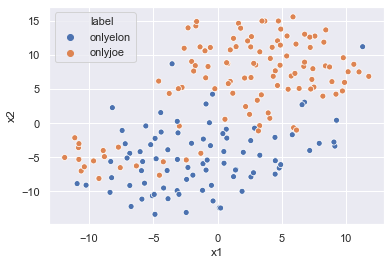

In [209]:
lab_data = pd.DataFrame(labfeatures, columns=['x1', 'x2'])
lab_data['label'] = laby
lab_data = lab_data.sample(frac=1)
sns.scatterplot(x='x1', y='x2', hue='label', data=lab_data)